# Forest Soil Characteristics Dataset

About this dataset: From Kaggle (https://www.kaggle.com/datasets/shubhamgupta012/forest-soil-characteristics-dataset)

"This dataset provides a comprehensive collection of forest soil characteristics, including various parameters and measurements. It contains data from different sites, each identified by a unique site code.

This dataset serves as a valuable resource for researchers, ecologists, and environmental scientists interested in studying forest soil characteristics and their impact on ecosystem dynamics. It can be used for various purposes, such as analyzing nutrient cycling, evaluating soil quality, and understanding the effects of land use changes on soil properties. The dataset provides a rich source of information that can contribute to a better understanding of forest ecosystems and support evidence-based decision-making in forestry and land management practices." (Kaggle)

### Sample Descriptive Variables
- HouseID
- REP#: replicate number
- CoreID: core identification
- Depth: depth range
  - soil depth (cm)
- LU_Current: current land use
- LU_Previous: previous land use
- Yr_Built: year built
- Lawn Age:
- CoarseVeg: coarse vegetation (i.e. branches, twigs, leaves, etc.)
- StructDen [StructDensity]: structural density
  - The ratio of the total ground floor area of a building to the total land area of the lot.
- BD: bulk density
  - The standard measure of soil density is bulk density, defined as the proportion of the weight of a soil relative to its volume, typically expressed as g/cm3 of soil. Compacted soils exhibit increased bulk density. Affects root and plant growth.
  - Info about BD: https://stormwater.pca.state.mn.us/index.php?title=Soil_health_indicator_sheet_-_Soil_compaction_(bulk_density)#:~:text=Bulk%20densities%20in%20undisturbed%20soils,soils%20exhibit%20increased%20bulk%20density.
- Soil percents: (the combination of Sand, Clay and Silt creates Loam soil, which is desirable for crops)
  - Sand_Perc: percentage of sand
  - Clay_Perc: percentage of clay
  - Silt_Perc: percentage of silt
  - https://geopard.tech/blog/soil-types-how-to-make-the-most-of/

### Microbial Variables

- N_Perc: nitrogen percentage
- C_Perc: carbon percentage
- C_N [C_N_Perc]: carbon to nitrogen ratio
- N_gm2: nitrogen content in grams per square meter
- C_gm2: carbon content in grams per square meter
- MB Carbon [MB_C]: microbial biomass carbon
  - https://www.soilquality.org.au/factsheets/microbial-biomass-carbon-nsw
- MBN [MB_N]: microbial biomass nitrogen
- Respiration: bacterial respiration
  - "When water fills more than 80 percent of the pore space, soil respiration reduces to a minimum level and most aerobic  micro-organisms begin to use nitrate (NO3) instead of oxygen, resulting in loss of nitrogen as gases (N2 and nitrogen oxides), emission of potent greenhouse gases, reduction in yields, and an increased need for nitrogen (N) fertilizer, which increases cost." (https://www.nrcs.usda.gov/sites/default/files/2022-10/Soil%20Respiration.pdf) 
- Initial NO3 (+NO2) [Initial Nitrates]: initial nitrate and nitrite content; useable nitrogen for the plants
- Initial NH4: initial ammonium content; usuable nitrogen for the plants (not as good as NO3 and +NO2)
- Net N Min: net nitrogen mineralization
  - Mineralization is the process by which organic nitrogen is converted to plant available inorganic forms. It is regarded as a potential indicator to comprehend the soil's response to biological change
- Net Nitr: net nitrification
  - Nitrification is where most nitrogen is leached into the soil and can contaminate ground water


#### Missing columns that would be nice to have:
- Temperature of soil
- pH of soil
- soil moisture

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read CSV
soil_df = pd.read_csv("datasets\Forest Soil Characteristics.csv")
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
soil_df.tail()

,Site,HouseID,REP#,CoreID,Depth,LU_Current,LU_Previous,Yr_Built,Lawn Age,CoarseVeg,StructDen,BD,N_Perc,C_Perc,C_N,N_gm2,C_gm2,Sand_Perc,Clay_Perc,Silt_Perc,MB Carbon,Respiration,Initial NO3 (+NO2),Initial NH4,MBN,Net N Min,Net Nitr
323,House30,30.0,2,30.2,10to30,Residential,Forest,1952.0,55.0,4+,1,1.245,0.071,1.967,27.698,176.830,4897.833,28.375,28.750,42.875,155.68,4.005,8.548,1.002,13.376,0.306,0.374
324,House30,30.0,1,30.1,30to70,Residential,Forest,1952.0,55.0,4+,1,1.297,0.040,0.532,13.465,204.868,2758.625,37.719,25.013,37.269,88.59,3.170,1.142,0.571,1.641,-0.029,-0.001
325,House30,30.0,2,30.2,30to70,Residential,Forest,1952.0,55.0,4+,1,1.420,0.035,0.427,12.067,201.191,2427.722,33.875,29.500,36.625,113.83,2.449,1.640,0.264,2.428,0.017,0.017
326,House30,30.0,1,30.1,70to100,Residential,Forest,1952.0,55.0,4+,1,1.662,0.047,0.579,12.201,236.756,2888.764,32.324,20.766,46.910,149.03,3.608,1.084,0.568,2.464,0.005,0.033
327,House30,30.0,2,30.2,70to100,Residential,Forest,1952.0,55.0,4+,1,0.935,0.049,0.585,11.872,138.267,1641.546,33.342,21.261,45.398,94.6,2.716,1.356,0.261,1.176,0.074,0.074


In [21]:
#Rename some columns
soil_df.rename(columns = {"MB Carbon": "MB_C", "MBN": "MB_N", "C_N": "C_N_Perc", "Initial NO3 (+NO2)": "Initial Nitrates", 
                          }, inplace = True)

#Remove comma from MB Carbon and convert to a float
import re
soil_df["MB_C"] = soil_df["MB_C"].replace(",", "", regex = True)
soil_df["MB_C"]
soil_df["MB_C"] = soil_df["MB_C"].astype(float)

#Convert CoarseVeg and StructDen to float
soil_df["CoarseVeg"] = soil_df["CoarseVeg"].replace("2+", 2, regex = True).replace("4+", 4, regex = True)
soil_df["CoarseVeg"].value_counts()

soil_df["StructDen"] = soil_df["StructDen"].replace("2+", 2, regex = True).astype(float)
soil_df["StructDen"].value_counts()

soil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Site              328 non-null    object 
 1   HouseID           264 non-null    float64
 2   REP#              328 non-null    int64  
 3   CoreID            328 non-null    object 
 4   Depth             328 non-null    object 
 5   LU_Current        328 non-null    object 
 6   LU_Previous       264 non-null    object 
 7   Yr_Built          264 non-null    float64
 8   Lawn Age          264 non-null    float64
 9   CoarseVeg         264 non-null    float64
 10  StructDen         264 non-null    float64
 11  BD                322 non-null    float64
 12  N_Perc            320 non-null    float64
 13  C_Perc            320 non-null    float64
 14  C_N_Perc          291 non-null    float64
 15  N_gm2             321 non-null    float64
 16  C_gm2             321 non-null    float64
 1

In [22]:
soil_df.columns
soil_df = soil_df.reindex(columns = ['Site', 'HouseID', 'REP#', 'CoreID', 'Depth', 'LU_Current', 
                                       'LU_Previous', 'Yr_Built', 'Lawn Age', 'CoarseVeg', 'StructDen', 'BD', 
                                       'Sand_Perc','Clay_Perc', 'Silt_Perc', 'Respiration', 'C_Perc',  
                                        'N_Perc', 'C_N_Perc', 'MB_C', 'MB_N', 'C_gm2', 'N_gm2', 'Initial Nitrates',
                                       'Initial NH4', 'Net N Min', 'Net Nitr'])
soil_df.tail()

,Site,HouseID,REP#,CoreID,Depth,LU_Current,LU_Previous,Yr_Built,Lawn Age,CoarseVeg,StructDen,BD,Sand_Perc,Clay_Perc,Silt_Perc,Respiration,C_Perc,N_Perc,C_N_Perc,MB_C,MB_N,C_gm2,N_gm2,Initial Nitrates,Initial NH4,Net N Min,Net Nitr
323,House30,30.0,2,30.2,10to30,Residential,Forest,1952.0,55.0,4.0,1.0,1.245,28.375,28.750,42.875,4.005,1.967,0.071,27.698,155.68,13.376,4897.833,176.830,8.548,1.002,0.306,0.374
324,House30,30.0,1,30.1,30to70,Residential,Forest,1952.0,55.0,4.0,1.0,1.297,37.719,25.013,37.269,3.170,0.532,0.040,13.465,88.59,1.641,2758.625,204.868,1.142,0.571,-0.029,-0.001
325,House30,30.0,2,30.2,30to70,Residential,Forest,1952.0,55.0,4.0,1.0,1.420,33.875,29.500,36.625,2.449,0.427,0.035,12.067,113.83,2.428,2427.722,201.191,1.640,0.264,0.017,0.017
326,House30,30.0,1,30.1,70to100,Residential,Forest,1952.0,55.0,4.0,1.0,1.662,32.324,20.766,46.910,3.608,0.579,0.047,12.201,149.03,2.464,2888.764,236.756,1.084,0.568,0.005,0.033
327,House30,30.0,2,30.2,70to100,Residential,Forest,1952.0,55.0,4.0,1.0,0.935,33.342,21.261,45.398,2.716,0.585,0.049,11.872,94.60,1.176,1641.546,138.267,1.356,0.261,0.074,0.074


## EDA and Cleaning

In [23]:
soil_df.duplicated().sum()

0

In [24]:
soil_df.shape

(328, 27)

In [25]:
print(f"Previous Land Use:\n {soil_df['LU_Previous'].value_counts(dropna = False)}")
print("Current Land Use:\n", soil_df['LU_Current'].value_counts(dropna = False))

Previous Land Use:
 Forest    180
Ag         84
NaN        64
Name: LU_Previous, dtype: int64
Current Land Use:
 Residential    264
Forest          64
Name: LU_Current, dtype: int64


#### Replacing Missing Values with Means

In [26]:
#Microbe stats before replacing NaN
soil_df[['Respiration', 'C_Perc', 'N_Perc', 'C_N_Perc', 'MB_C', 'MB_N', 'C_gm2', 'N_gm2', 'Initial Nitrates',
         'Initial NH4', 'Net N Min', 'Net Nitr']].describe()

,Respiration,C_Perc,N_Perc,C_N_Perc,MB_C,MB_N,C_gm2,N_gm2,Initial Nitrates,Initial NH4,Net N Min,Net Nitr
count,320.000000,320.000000,320.000000,291.000000,320.000000,319.000000,321.000000,321.000000,320.000000,320.000000,319.000000,319.000000
mean,5.606775,1.059263,0.078947,12.112962,199.367555,28.089273,1404.591776,111.340785,5.033394,2.669500,0.240232,0.204881
std,4.729636,1.160559,0.078247,4.780619,197.314421,38.545303,1422.834436,91.622289,8.040060,4.392406,0.709831,0.474282
min,0.925000,0.000000,0.000000,4.844000,39.851933,0.488000,0.000000,0.000000,0.227000,0.201000,-0.592000,-0.575000
25%,2.823750,0.192000,0.021000,9.186500,80.512500,1.863500,282.192000,0.000000,0.265750,0.586750,-0.021500,0.000000
50%,3.687500,0.522500,0.045500,11.432000,114.567287,8.474000,1171.990000,116.667000,1.379500,1.083000,0.043000,0.026000
75%,5.846250,1.765750,0.128000,13.287000,226.247500,38.446500,2160.853000,176.739000,6.869500,2.592000,0.301000,0.201500
max,30.720000,4.919000,0.333000,41.996000,1303.480000,174.977000,11306.278000,508.428000,59.750000,34.928000,9.419000,4.907000


In [27]:
#Fill N/A in the C_N_Perc:
mean_N = soil_df["N_Perc"].mean()
mean_C = soil_df["C_Perc"].mean()
mean_C_N = mean_C/mean_N
mean_Resp = soil_df["Respiration"].mean()
mean_MB_C = soil_df["MB_C"].mean()
mean_MB_N = soil_df["MB_N"].mean()
mean_C_gm2 = soil_df["C_gm2"].mean()
mean_N_gm2 = soil_df["N_gm2"].mean()
mean_Nitrates = soil_df['Initial Nitrates'].mean()
mean_NH4 = soil_df["Initial NH4"].mean()
mean_Net_N = soil_df["Net N Min"].mean()
mean_Net_Nitr = soil_df["Net Nitr"].mean()

soil_df["N_Perc"].fillna(value = mean_N, inplace = True)
soil_df["C_Perc"].fillna(value = mean_C, inplace = True)
soil_df["C_N_Perc"].fillna(value = mean_C_N, inplace = True)
soil_df.fillna({'Respiration': mean_Resp, 'MB_C': mean_MB_C, 'MB_N': mean_MB_N, 'C_gm2': mean_C_gm2, 'N_gm2': mean_N_gm2, 
                'Initial Nitrates': mean_Nitrates, 'Initial NH4': mean_NH4, 'Net N Min': mean_Net_N, 'Net Nitr': mean_Net_Nitr}, 
               inplace = True)



In [28]:
#Finding percent missing
for col in soil_df:
    pct_missing = soil_df[col].isnull().mean().round(6)*100
    if pct_missing > 0:
        print(col, "-", pct_missing)

HouseID - 19.5122
LU_Previous - 19.5122
Yr_Built - 19.5122
Lawn Age - 19.5122
CoarseVeg - 19.5122
StructDen - 19.5122
BD - 1.8293
Sand_Perc - 14.0244
Clay_Perc - 14.0244
Silt_Perc - 14.0244


In [29]:
#Microbe stats after replacing NaN
soil_df[['Respiration', 'C_Perc', 'N_Perc', 'C_N_Perc', 'MB_C', 'MB_N', 'C_gm2', 'N_gm2', 'Initial Nitrates',
         'Initial NH4', 'Net N Min', 'Net Nitr']].describe()

,Respiration,C_Perc,N_Perc,C_N_Perc,MB_C,MB_N,C_gm2,N_gm2,Initial Nitrates,Initial NH4,Net N Min,Net Nitr
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,5.606775,1.059262,0.078947,12.260110,199.367555,28.089273,1404.591776,111.340785,5.033394,2.669500,0.240232,0.204881
std,4.671423,1.146274,0.077284,4.520970,194.885843,38.011162,1407.522936,90.636317,7.941102,4.338344,0.699994,0.467710
min,0.925000,0.000000,0.000000,4.844000,39.851933,0.488000,0.000000,0.000000,0.227000,0.201000,-0.592000,-0.575000
25%,2.839250,0.196000,0.021000,9.311500,80.827500,1.926000,288.348750,0.000000,0.267750,0.591250,-0.016500,0.000000
50%,3.711000,0.539000,0.047000,11.929000,118.715000,9.269500,1200.639500,112.071893,1.577000,1.100500,0.045000,0.034000
75%,5.838500,1.709250,0.119750,13.417409,222.315749,37.076750,2138.491000,175.187000,6.688500,2.669500,0.280000,0.204881
max,30.720000,4.919000,0.333000,41.996000,1303.480000,174.977000,11306.278000,508.428000,59.750000,34.928000,9.419000,4.907000


#### Description Stats

In [30]:
#Location stats
#agg = [['count', 'mean', 'std', 'min', '50%', 'max']]
soil_df[['REP#','Yr_Built', 'Lawn Age', 'CoarseVeg', 'StructDen', 'BD', 'Sand_Perc','Clay_Perc', 'Silt_Perc']].agg([
    'count', 'mean', 'std', 'min', 'median', 'max'])

,REP#,Yr_Built,Lawn Age,CoarseVeg,StructDen,BD,Sand_Perc,Clay_Perc,Silt_Perc
count,328.000000,264.000000,264.000000,264.000000,264.000000,322.000000,282.000000,282.000000,282.000000
mean,1.615854,1972.181818,34.818182,2.939394,1.727273,1.102003,43.047330,23.550691,33.403415
std,0.604766,18.069498,18.069498,1.000058,0.446208,0.211488,15.995809,9.994355,10.839772
min,1.000000,1920.000000,5.000000,2.000000,1.000000,0.493000,7.125000,1.251000,5.853000
median,2.000000,1968.000000,39.000000,2.000000,2.000000,1.134500,41.522000,22.642000,34.155000
max,3.000000,2002.000000,87.000000,4.000000,2.000000,1.718000,89.489000,54.041000,66.100000


## Visualization

- Year between 1920 and 2002, mean 1972
  - Lawn Age between 87 (Yr_Built = 1920) and 5 (Yr_Built = 2002) years, with average of 35 years
- Average BD is 1.10, but what is it like in the different soil types?
- Land Use: 
  - Previous Land Use: Agriculture, Forest, or missing
  - Current Land Use: Forest, Residental
- Soils consist of higher sand content than clay or silt

In [31]:
#looking at metrics for soil samples
soil_type = soil_df.groupby("CoreID", dropna = True)[
    "Clay_Perc", "Sand_Perc", "Silt_Perc", "Respiration", "Initial Nitrates", "Initial NH4"].mean()
soil_type.head(10)

C:\Users\omdel\AppData\Local\Temp\ipykernel_14668\736565670.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  soil_type = soil_df.groupby("CoreID", dropna = True)[


,Clay_Perc,Sand_Perc,Silt_Perc,Respiration,Initial Nitrates,Initial NH4
CoreID,,,,,,
1.1,25.702500,47.964000,26.333500,8.670500,1.055250,1.645750
1.2,29.105333,49.254667,21.640667,9.762500,1.785500,1.538500
10.1,20.745000,37.766000,41.490000,17.800000,32.684000,1.979000
10.2,35.158333,19.019667,45.821667,10.949750,9.947000,1.575500
10.3,32.000000,20.337667,47.662333,4.907000,4.033333,1.175667
11.1,26.685000,27.726750,45.587750,3.099250,6.291000,0.528750
11.2,33.138000,19.907000,46.955000,3.570444,3.353848,1.202125
12.1,32.028750,27.088750,40.882250,7.236250,5.394750,1.774500
12.2,35.854667,25.166000,38.979333,5.371000,10.316500,0.651750


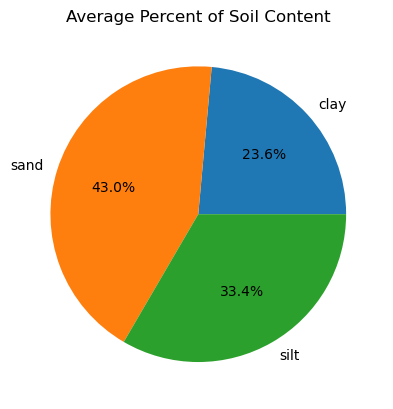

In [32]:
#percent of soil materials within samples
soil_types_chart = pd.DataFrame({
    "clay": soil_df["Clay_Perc"], "sand": soil_df["Sand_Perc"], "silt": soil_df["Silt_Perc"]}).mean()
soil_labels = ["clay", "sand", "silt"]

plt.pie(soil_types_chart, labels = soil_labels, autopct = '%1.1f%%')
plt.title("Average Percent of Soil Content")
plt.show()

In [33]:
depth_soil_mean = soil_df.groupby("Depth")["BD", "MB_C", "MB_N", "C_N_Perc", "Sand_Perc", "Clay_Perc", "Silt_Perc", 
                                     "Respiration", "Initial Nitrates", "Initial NH4", 
                                     "Net N Min", "Net Nitr"].mean()

depth_soil_mean

C:\Users\omdel\AppData\Local\Temp\ipykernel_14668\257797628.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  depth_soil_mean = soil_df.groupby("Depth")["BD", "MB_C", "MB_N", "C_N_Perc", "Sand_Perc", "Clay_Perc", "Silt_Perc",


,BD,MB_C,MB_N,C_N_Perc,Sand_Perc,Clay_Perc,Silt_Perc,Respiration,Initial Nitrates,Initial NH4,Net N Min,Net Nitr
Depth,,,,,,,,,,,,
0to10,0.851817,424.029259,84.165845,14.057024,41.467071,17.839048,40.686786,10.739680,12.737651,4.429835,0.787247,0.573913
10to30,1.108085,164.266026,18.001979,13.655127,38.428341,23.774573,37.797061,4.570229,3.651797,3.321116,0.119149,0.190303
30to70,1.222160,98.160477,4.758052,10.936833,43.190815,26.246494,30.566383,3.344997,1.871541,1.583311,0.002735,0.024401
70to100,1.235558,111.014457,5.431215,10.391457,48.677273,23.591870,27.736130,3.772194,1.872585,1.343738,0.051797,0.030906


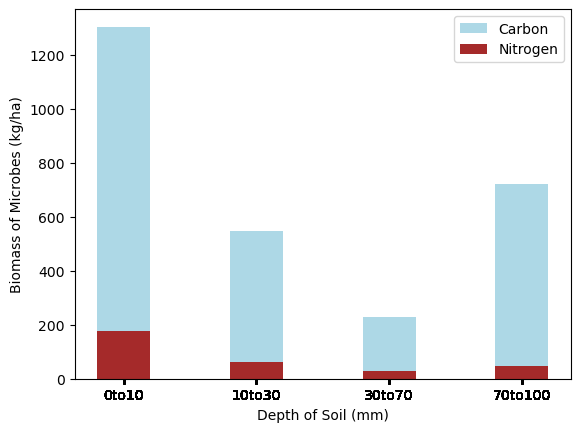

In [34]:
x = soil_df["Depth"]
y1 = soil_df["MB_C"]
y2 = soil_df["MB_N"]
width = 0.4
  
# plot data in grouped manner of bar type
plt.bar(x, y1, width, color='lightblue')
plt.bar(x, y2, width, color='brown')
plt.xticks(x)
plt.xlabel("Depth of Soil (mm)")
plt.ylabel("Biomass of Microbes (kg/ha)")
plt.legend(["Carbon", "Nitrogen"], loc = "upper right")
plt.show()

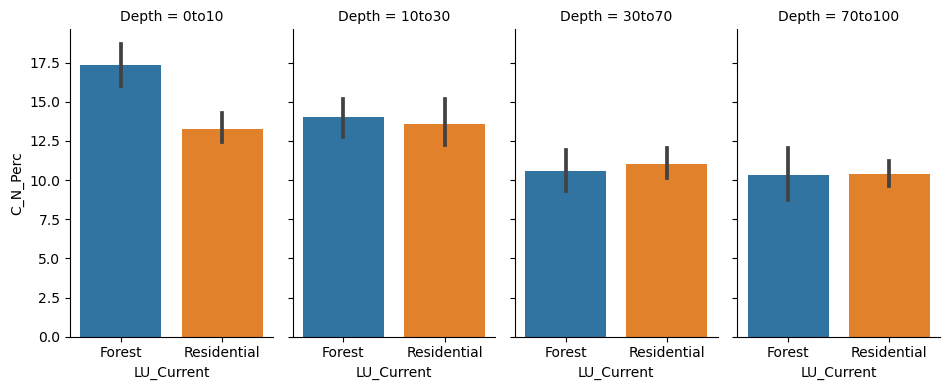

In [35]:
#Plot Microbe Biomass of Nitrogen only to see closer
#sns.catplot(x = "Depth", y = "MB Nitrogen", kind = "box", data = soil_df)

nitrogen_only = sns.catplot(
    data=soil_df, x="LU_Current", y="C_N_Perc", col="Depth",
    kind="bar", height=4, aspect=0.6,
)

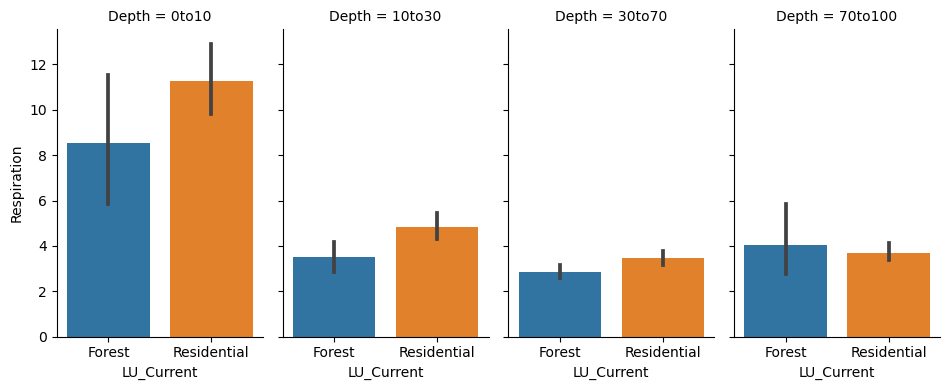

In [36]:
#Carbon Only
carbon_only = sns.catplot(
    data=soil_df, x="LU_Current", y="Respiration", col="Depth",
    kind="bar", height=4, aspect=0.6,
)

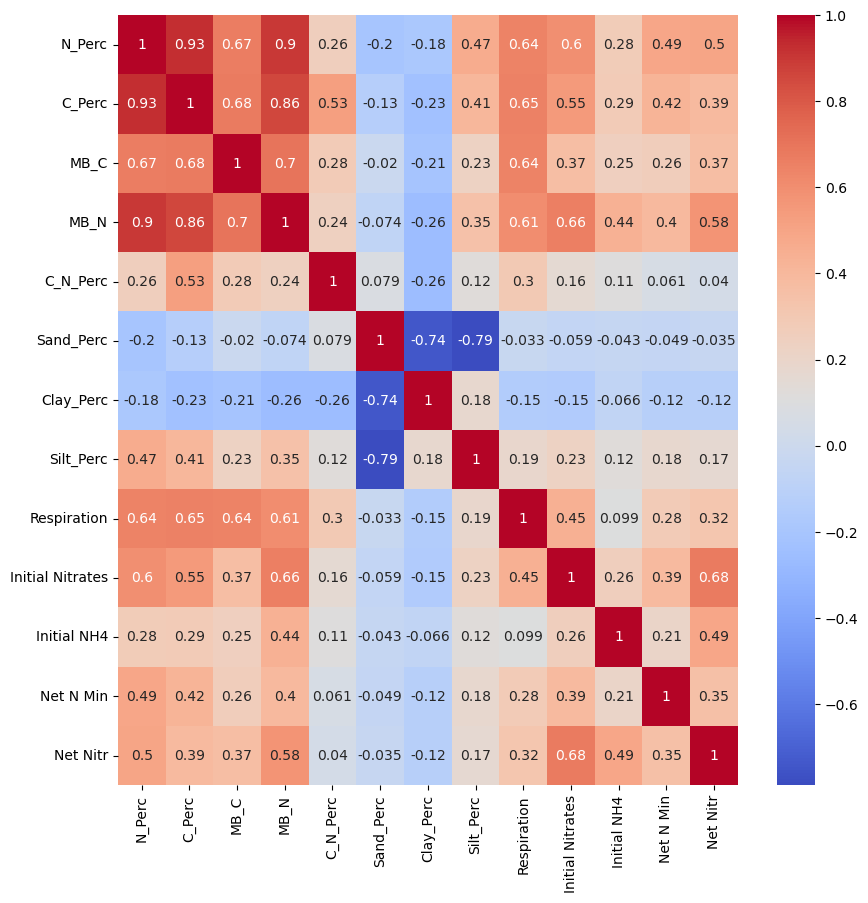

In [37]:
nitrogen_fixing = soil_df[["N_Perc","C_Perc","MB_C", "MB_N", "C_N_Perc","Sand_Perc", "Clay_Perc", "Silt_Perc", 
                                     "Respiration", "Initial Nitrates", "Initial NH4", "Net N Min", "Net Nitr"]]

corr_heatmap = nitrogen_fixing.corr()
fig, ax = plt.subplots(figsize = (10,10))

fig = sns.heatmap(corr_heatmap, ax = ax,
                   xticklabels = corr_heatmap.columns.values,
                   yticklabels = corr_heatmap.columns.values,
                  cmap = "coolwarm",
                  annot = True
                  )


In [38]:
#Correlation values of unique pairs only

#This np.triu method retains the upper triangular values of correlation matrix and makes the lower triangular values Null
upper_corr_mat = corr_heatmap.where(np.triu(np.ones(corr_heatmap.shape), k=1).astype(bool))
  
#Converts to 1-D series, drop Null values, drop duplicated values, and sort values
unique_corr_pairs = upper_corr_mat.unstack().dropna().drop_duplicates().sort_values(ascending = False)

#Positive Correlated values
correlated_values_df = pd.DataFrame(unique_corr_pairs)
correlated_values_df


0
C_Perc           N_Perc            0.926277
MB_N             N_Perc            0.896357
                 C_Perc            0.857119
                 MB_C              0.703850
Net Nitr         Initial Nitrates  0.678026
MB_C             C_Perc            0.677518
                 N_Perc            0.666843
Initial Nitrates MB_N              0.663857
Respiration      C_Perc            0.654927
                 N_Perc            0.644370
                 MB_C              0.644191
                 MB_N              0.605296
Initial Nitrates N_Perc            0.598871
Net Nitr         MB_N              0.576963
Initial Nitrates C_Perc            0.545962
C_N_Perc         C_Perc            0.525765
Net Nitr         N_Perc            0.499251
                 Initial NH4       0.494420
Net N Min        N_Perc            0.491207
Silt_Perc        N_Perc            0.465275
Initial Nitrates Respiration       0.445546
Initial NH4      MB_N              0.435946
Net N Min        C_Perc            0.423204
Silt_Perc        C_Perc            0.406945
Net N Min        MB_N              0.395284
Net Nitr         C_Perc            0.391012
Net N Min        Initial Nitrates  0.389793
Initial Nitrates MB_C              0.370373
Net Nitr         MB_C              0.366462
                 Net N Min         0.353216
Silt_Perc        MB_N              0.346276
Net Nitr         Respiration       0.317739
Respiration      C_N_Perc          0.296937
Initial NH4      C_Perc            0.286760
C_N_Perc         MB_C              0.283628
Net N Min        Respiration       0.282802
Initial NH4      N_Perc            0.280030
Net N Min        MB_C              0.260254
C_N_Perc         N_Perc            0.257912
Initial NH4      Initial Nitrates  0.256347
                 MB_C              0.250640
C_N_Perc         MB_N              0.239106
Initial Nitrates Silt_Perc         0.229178
Silt_Perc        MB_C              0.225960
Net N Min        Initial NH4       0.208246
Respiration      Silt_Perc         0.186219
Net N Min        Silt_Perc         0.181135
Silt_Perc        Clay_Perc         0.177493
Net Nitr         Silt_Perc         0.165882
Initial Nitrates C_N_Perc          0.161208
Initial NH4      Silt_Perc         0.123705
Silt_Perc        C_N_Perc          0.121560
Initial NH4      C_N_Perc          0.108453
                 Respiration       0.099488
Sand_Perc        C_N_Perc          0.078971
Net N Min        C_N_Perc          0.061417
Net Nitr         C_N_Perc          0.040388
Sand_Perc        MB_C             -0.019573
Respiration      Sand_Perc        -0.033338
Net Nitr         Sand_Perc        -0.035251
Initial NH4      Sand_Perc        -0.042581
Net N Min        Sand_Perc        -0.048958
Initial Nitrates Sand_Perc        -0.059036
Initial NH4      Clay_Perc        -0.066133
Sand_Perc        MB_N             -0.073519
Net N Min        Clay_Perc        -0.118313
Net Nitr         Clay_Perc        -0.123561
Sand_Perc        C_Perc           -0.130560
Respiration      Clay_Perc        -0.148736
Initial Nitrates Clay_Perc        -0.154210
Clay_Perc        N_Perc           -0.181703
Sand_Perc        N_Perc           -0.202017
Clay_Perc        MB_C             -0.214043
                 C_Perc           -0.232848
                 MB_N             -0.258323
                 C_N_Perc         -0.258420
                 Sand_Perc        -0.744992
Silt_Perc        Sand_Perc        -0.788711

### Convert soil_df to csv

In [39]:
soil_df.to_csv("soil_cleaned.csv")